## A simple grid MRF with Potts potentials in AD3

In [1]:
import itertools
import ad3
import numpy as np

Set parameters of the model

In [2]:
grid_size = 20
num_states = 5

Create a factor graph

In [3]:
factor_graph = ad3.PFactorGraph()

Create variables lying on a grid with random potentials.

In [4]:
multi_variables = []
random_grid = np.random.uniform(size=(grid_size, grid_size, num_states))
for i in range(grid_size):
    multi_variables.append([])
    for j in range(grid_size):
        new_variable = factor_graph.create_multi_variable(num_states)
        new_variable.set_log_potentials(random_grid[i, j])
        multi_variables[i].append(new_variable)

Create potts potentials for edges.

In [5]:
alpha = .5
potts_matrix = alpha * np.eye(num_states)
potts_potentials = potts_matrix.ravel().tolist()

Create factors for edges from potts potentials

In [6]:
for i, j in itertools.product(range(grid_size), repeat=2):
    if (j > 0):
        #horizontal edge
        edge_variables = [multi_variables[i][j - 1], multi_variables[i][j]]
        factor_graph.create_factor_dense(edge_variables, potts_potentials)
    
    if (i > 0):
        #horizontal edge
        edge_variables = [multi_variables[i - 1][j], multi_variables[i][j]]
        factor_graph.create_factor_dense(edge_variables, potts_potentials)
    

Set model parameters and compute the map using AD3

In [7]:
value, marginals, edge_marginals, status = factor_graph.solve()

Visualize resulting MAP

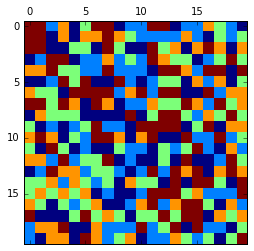

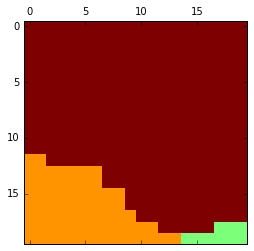

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

res = np.array(marginals).reshape(20, 20, 5)
plt.matshow(np.argmax(random_grid, axis=-1), vmin=0, vmax=4)
plt.matshow(np.argmax(res, axis=-1), vmin=0, vmax=4)